In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import MinMaxScaler

from IPython.display import HTML

# Boston House Prediction By linear Regression

# Step 1:-

In [4]:
# Load the Dataset
boston=load_boston()
#Description of dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
#Put data into Pandas DataFrames
features=pd.DataFrame(boston.data, columns=boston.feature_names)
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [6]:
target=pd.DataFrame(boston.target,columns=['Target'])
target

,Target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


In [7]:
max(target['Target'])

50.0

In [8]:
min(target['Target'])

5.0

In [9]:
#concatenate feature & Tareget into a Single DataFrame
#axis = 1 makes it concatenate columnwise
df=pd.concat([features,target],axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [10]:
#use round(decimals=2) to set the precison to 2 Decimal
df.describe().round(decimals=2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


# Applying Correlation

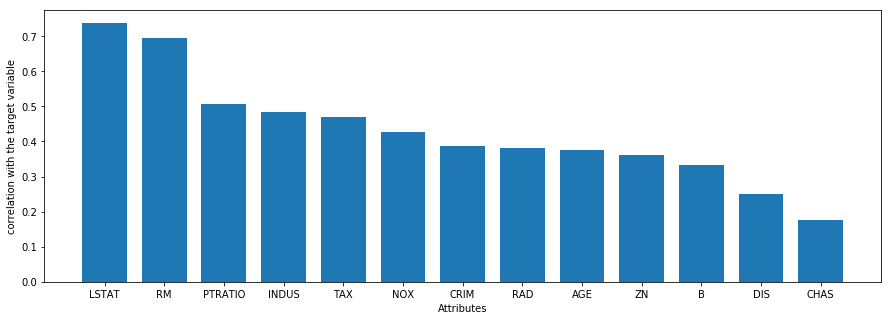

In [11]:
#calculate the correlation between every columns the data
corr=df.corr('pearson')
#take absolute values of correlation 
corrs=[abs(corr[attr]['Target']) for attr in list(features)]

#make a list of pairs [(corr, features)]
l=list(zip(corrs,list(features)))

#Sort the list of pairs in reverse/descending order,
#with the correlation value as the key for sorting
l.sort(key=lambda x:x[0],reverse=True)

#"unzip" the pairs to two lists
corrs,labels=list(zip((*l)))

#Now plotting the correlation w.r.t the target variable as bar graph
index=np.arange(len(labels))
plt.figure(figsize=(15,5))
plt.bar(index,corrs,width=0.75)
plt.xlabel('Attributes')
plt.ylabel('correlation with the target variable')
plt.xticks(index,labels)
plt.show()


# Normalization of Data 

In [12]:
X=df['RM'].values #Will indicate mostly of -ve slope 
Y=df['Target'].values


In [13]:
#before normalization
print(Y[:5])

[24.  21.6 34.7 33.4 36.2]


In [14]:
x_scaler=MinMaxScaler()
X=x_scaler.fit_transform(X.reshape(-1,1))
X=X[:,-1]
y_scaler=MinMaxScaler()
Y=y_scaler.fit_transform(Y.reshape(-1,1))
Y=Y[:,-1]




In [15]:
#after normalisation
print(Y[:5])

[0.42222222 0.36888889 0.66       0.63111111 0.69333333]


# Splitting Data

In [16]:
#0.2 indicating 20% of data is Randomly Sampled as Testing data
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.2)

# Loss Function

In [17]:
#Error Function
def error(m,x,c,t):
    N=x.size
    e=sum(((m * x + c) - t)**2)
    return e * 1/(2 * N)

# Applying Gradiant Descent

In [18]:
def update(m,x,c,t,learning_rate):
    grad_m = sum (2 * ( (m * x + c) - t) * x)
    grad_c = sum (2 * ( (m * x + c) - t))
    m=m- grad_m * learning_rate
    c = c- grad_c * learning_rate
    return [m, c];

In [19]:
def gradient_descent(init_m,init_c,x,t,learning_rate,iterations,error_threshold):
    m = init_m
    c = init_c
    error_values = list()
    mc_values = list()
    for i in range (iterations):
        e=error(m, x, c, t)
        #print("Iteration :"+str(i)+"Error :"+str(e))
        if e<error_threshold:
            print('Error less that the threshold,Stoping Gradient Descent')
            break
        
        error_values.append(e)
        m, c = update(m, x, c, t, learning_rate) 
        mc_values.append((m, c))
        
        return [m, c, error_values, mc_values];    

# Model Training Visulization

In [30]:
%%time
init_m = 0.9
init_c = 0
learning_rate=0.001
iterations=250
error_threshold=0.001

m, c, error_values, mc_values = gradient_descent(init_m, init_c, xtrain, ytrain, learning_rate, iterations, error_threshold)



Wall time: 1e+03 µs


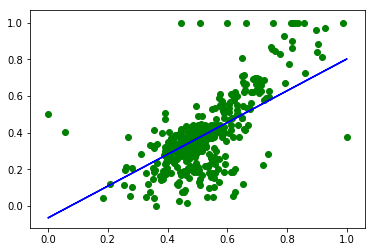

In [31]:
import matplotlib.animation
plt.scatter(xtrain,ytrain,color='g')
plt.plot(xtrain,(m*xtrain+c),color='b')
    


Text(0.5, 0, 'Iterations')

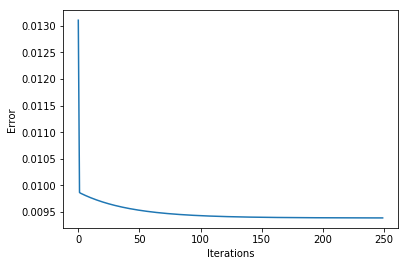

In [32]:
plt.plot(np.arange(len(error_values)),error_values)
plt.ylabel('Error')
plt.xlabel('Iterations')

In [34]:
mc_values_anim=mc_values[0:250:5]

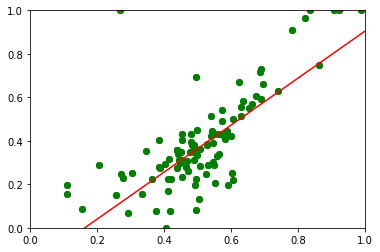

In [35]:

fig,ax=plt.subplots()
ln,=plt.plot([],[],'ro-',animated=True)

def init():
    plt.scatter(xtest,ytest,color='g')
    ax.set_xlim(0,1.0)
    ax.set_ylim(0,1.0)
    return ln,

def update_frame(frame):
    m,c=mc_values_anim[frame]
    x1,y1=(-0.5), m* (-0.5 )+c
    x2,y2=(1.5),m*(1.5)+c
    ln.set_data([x1,x2],[y1,y2])
    return ln,

anim =FuncAnimation(fig, update_frame, frames=range(len(mc_values_anim)),interval=50, init_func=init, blit=True)
HTML(anim.to_html5_video())

# Prediction and Evalution 

In [39]:
#Calculate the perdiction on test as vectorised operation
predicted = (m * xtest + c)

In [40]:
#Compute MSE for the predicted values on testing set
mean_squared_error(ytest, predicted)

0.023115387686320942

In [41]:
p=pd.DataFrame(list(zip(xtest, ytest, predicted)),columns=['x','target_y','predicted_y'])
p.head()

,x,target_y,predicted_y
0,0.494922,0.693333,0.364112
1,0.333972,0.155556,0.224355
2,0.452002,0.348889,0.326844
3,0.606821,0.220000,0.461277
4,0.922399,1.000000,0.735301


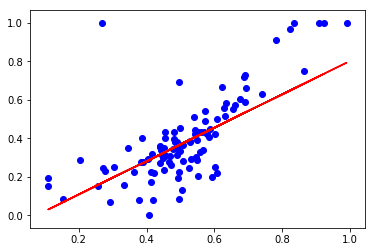

In [42]:
plt.scatter(xtest, ytest, color ='b')
plt.plot(xtest, predicted, color ='r')

In [45]:
#reshaping the array and reverting normalisation
predicted=predicted.reshape(-1,1)
xtest=xtest.reshape(-1,1)
ytest=ytest.reshape(-1,1)

xtest_scaled=x_scaler.inverse_transform(xtest)
ytest_scaled=y_scaler.inverse_transform(ytest)
predicted_scaled=y_scaler.inverse_transform(predicted)

#getting rid of extra dimension by slicing 
xtest_scaled=xtest_scaled[:,-1]
ytest_scaled=ytest_scaled[:,-1]
predicted_scaled=predicted_scaled[:,-1]

p=pd.DataFrame(list(zip(xtest_scaled,ytest_scaled,predicted_scaled)),columns=["X_Test","Y_Test","Predicted"])
p.round(decimals=3)



,X_Test,Y_Test,Predicted
0,6.144,36.2,21.385
1,5.304,12.0,15.096
2,5.920,20.7,19.708
3,6.728,14.9,25.757
4,8.375,50.0,38.089
5,6.849,28.2,26.663
6,4.138,11.9,6.366
7,6.513,20.2,24.148
8,7.148,37.3,28.902
9,4.138,13.8,6.366
